# Breast Cancer Histology Imaging
mkfold.py -- from: https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/
(Spanhol et al., 2016)

# Keras Modeling
Processing and visualization scripts adapted from: https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

from collections import Counter
import cv2
import os

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizer_v1 import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

# Labeling Scripts

In [17]:
# For 2-class classification
img_size = 224
def get_data(data_dir):
    data = [] 
    path = data_dir
    for img in os.listdir(path):
        if img[4] == 'B':
            class_num = 0
        else:
            class_num = 1
        try:
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append([resized_arr, class_num])
        except Exception as e:
            print(e)
    return np.array(data)

In [4]:
## For multiclass classification
img_size = 224
def get_data_MC(data_dir):
    data = [] 
    path = data_dir
    for img in os.listdir(path):
        name1 = img.split("-")
        name2 = name1[0].split("_")
        label = name2[2]

        if label == 'A':
            class_num = 0
        elif label == 'F':
            class_num = 1
        elif label == 'PT':
            class_num = 2
        elif label == 'TA':
            class_num = 3
        elif label == 'DC':
            class_num = 4
        elif label == 'LC':
            class_num = 5
        elif label == 'MC':
            class_num = 6
        elif label == 'PC':
            class_num = 7
            
        try:
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append([resized_arr, class_num])
        except Exception as e:
            print(e)
    return np.array(data)

In [19]:
# 40X MAG

train41 = get_data_MC('./fold1/train/40X')
val41 = get_data_MC('./fold1/test/40X')

train42 = get_data_MC('./fold2/train/40X')
val42 = get_data_MC('./fold2/test/40X')

train43 = get_data_MC('./fold3/train/40X')
val43 = get_data_MC('./fold3/test/40X')

train44 = get_data_MC('./fold4/train/40X')
val44 = get_data_MC('./fold4/test/40X')

train45 = get_data_MC('./fold5/train/40X')
val45= get_data_MC('./fold5/test/40X')

train_set40 = [train41, train42, train43, train44, train45]
val_set40 = [val41, val42, val43, val44, val45]

<ipython-input-4-c462abe301ac>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [5]:
# 100X MAG

train1 = get_data_MC('./fold1/train/100X')
val1 = get_data_MC('./fold1/test/100X')

train2 = get_data_MC('./fold2/train/100X')
val2 = get_data_MC('./fold2/test/100X')

train3 = get_data_MC('./fold3/train/100X')
val3 = get_data_MC('./fold3/test/100X')

train4 = get_data_MC('./fold4/train/100X')
val4 = get_data_MC('./fold4/test/100X')

train5 = get_data_MC('./fold5/train/100X')
val5= get_data_MC('./fold5/test/100X')

train_set = [train1, train2, train3, train4, train5]
val_set = [val1, val2, val3, val4, val5]

<ipython-input-4-c462abe301ac>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [21]:
train21 = get_data_MC('./fold1/train/200X')
val21 = get_data_MC('./fold1/test/200X')

train22 = get_data_MC('./fold2/train/200X')
val22 = get_data_MC('./fold2/test/200X')

train23 = get_data_MC('./fold3/train/200X')
val23 = get_data_MC('./fold3/test/200X')

train24 = get_data_MC('./fold4/train/200X')
val24 = get_data_MC('./fold4/test/200X')

train25 = get_data_MC('./fold5/train/200X')
val25= get_data_MC('./fold5/test/200X')

train_set200 = [train21, train22, train23, train24, train25]
val_set200 = [val21, val22, val23, val24, val25]

<ipython-input-4-c462abe301ac>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [22]:
train421 = get_data_MC('./fold1/train/400X')
val421 = get_data_MC('./fold1/test/400X')

train422 = get_data_MC('./fold2/train/400X')
val422 = get_data_MC('./fold2/test/400X')

train423 = get_data_MC('./fold3/train/400X')
val423 = get_data_MC('./fold3/test/400X')

train424 = get_data_MC('./fold4/train/400X')
val424 = get_data_MC('./fold4/test/400X')

train425 = get_data_MC('./fold5/train/400X')
val425= get_data_MC('./fold5/test/400X')

train_set400 = [train421, train422, train423, train424, train425]
val_set400 = [val421, val422, val423, val424, val425]

<ipython-input-4-c462abe301ac>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [12]:
# explore how many of each type are in all training data combined

x = []
for fold in train_set:
    for i in fold:
        if i[1] == 0:
            x.append("A")
        elif i[1] == 1:
            x.append("F")
        elif i[1] == 2:
            x.append("PT")
        elif i[1] == 3:
            x.append("TA")
        elif i[1] == 4:
            x.append("DC")
        elif i[1] == 5:
            x.append("LC")
        elif i[1] == 6:
            x.append("MC")
        elif i[1] == 7:
            x.append("PC")

<AxesSubplot:ylabel='count'>

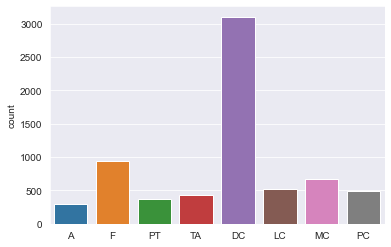

In [13]:
sns.set_style('darkgrid')
sns.countplot(x)

In [14]:
Counter(x)

Counter({'A': 290,
         'F': 939,
         'PT': 379,
         'TA': 430,
         'DC': 3105,
         'LC': 526,
         'MC': 678,
         'PC': 490})

In [15]:
# explore how many of each type are in all testing data combined

y = []
for fold in val_set:
    for i in fold:
        if i[1] == 0:
            y.append("A")
        elif i[1] == 1:
            y.append("F")
        elif i[1] == 2:
            y.append("PT")
        elif i[1] == 3:
            y.append("TA")
        elif i[1] == 4:
            y.append("DC")
        elif i[1] == 5:
            y.append("LC")
        elif i[1] == 6:
            y.append("MC")
        elif i[1] == 7:
            y.append("PC")

C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

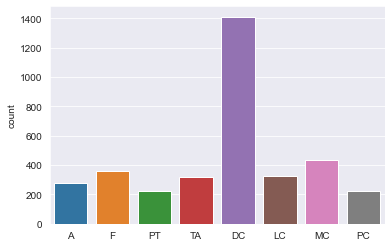

In [16]:
sns.set_style('darkgrid')
sns.countplot(y)

In [17]:
Counter(y)

Counter({'A': 275,
         'F': 361,
         'PT': 226,
         'TA': 320,
         'DC': 1410,
         'LC': 324,
         'MC': 432,
         'PC': 220})

# Visualize overall data for each magnification

In [43]:
def data_analysis(train_set, val_set):
    x = []
    for fold in train_set:
        for i in fold:
            if i[1] == 0:
                x.append("A")
            elif i[1] == 1:
                x.append("F")
            elif i[1] == 2:
                x.append("PT")
            elif i[1] == 3:
                x.append("TA")
            elif i[1] == 4:
                x.append("DC")
            elif i[1] == 5:
                x.append("LC")
            elif i[1] == 6:
                x.append("MC")
            elif i[1] == 7:
                x.append("PC")
                
    y = []
    for fold_v in val_set:
        for j in fold_v:
            if j[1] == 0:
                y.append("A")
            elif j[1] == 1:
                y.append("F")
            elif j[1] == 2:
                y.append("PT")
            elif j[1] == 3:
                y.append("TA")
            elif j[1] == 4:
                y.append("DC")
            elif j[1] == 5:
                y.append("LC")
            elif j[1] == 6:
                y.append("MC")
            elif j[1] == 7:
                y.append("PC")
                
        sns.set_style('darkgrid')
        sns.countplot(x)

        sns.set_style('darkgrid')
        sns.countplot(y)
        
        print("X:", Counter(x))
        print("Y:", Counter(y))

C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\si

X: Counter({'DC': 2895, 'F': 904, 'MC': 635, 'PC': 493, 'LC': 478, 'TA': 429, 'PT': 340, 'A': 292})
Y: Counter({'DC': 298, 'LC': 83, 'F': 80, 'TA': 67, 'MC': 62, 'PT': 58, 'A': 50, 'PC': 47})
X: Counter({'DC': 2895, 'F': 904, 'MC': 635, 'PC': 493, 'LC': 478, 'TA': 429, 'PT': 340, 'A': 292})
Y: Counter({'DC': 537, 'LC': 156, 'MC': 150, 'F': 146, 'TA': 130, 'A': 100, 'PC': 87, 'PT': 71})
X: Counter({'DC': 2895, 'F': 904, 'MC': 635, 'PC': 493, 'LC': 478, 'TA': 429, 'PT': 340, 'A': 292})

C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\si


Y: Counter({'DC': 814, 'MC': 221, 'F': 212, 'LC': 209, 'TA': 178, 'A': 150, 'PC': 141, 'PT': 109})
X: Counter({'DC': 2895, 'F': 904, 'MC': 635, 'PC': 493, 'LC': 478, 'TA': 429, 'PT': 340, 'A': 292})
Y: Counter({'DC': 1103, 'MC': 298, 'F': 284, 'LC': 260, 'TA': 245, 'A': 214, 'PC': 183, 'PT': 147})


C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


X: Counter({'DC': 2895, 'F': 904, 'MC': 635, 'PC': 493, 'LC': 478, 'TA': 429, 'PT': 340, 'A': 292})
Y: Counter({'DC': 1425, 'MC': 390, 'F': 361, 'TA': 316, 'LC': 302, 'A': 278, 'PC': 232, 'PT': 205})


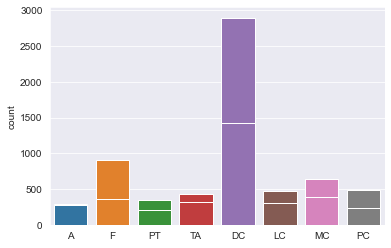

In [44]:
# 40X
data_analysis(train_set40, val_set40)

C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\si

X: Counter({'DC': 3105, 'F': 939, 'MC': 678, 'LC': 526, 'PC': 490, 'TA': 430, 'PT': 379, 'A': 290})
Y: Counter({'DC': 296, 'LC': 87, 'F': 83, 'MC': 71, 'PT': 66, 'TA': 65, 'A': 47, 'PC': 45})
X: Counter({'DC': 3105, 'F': 939, 'MC': 678, 'LC': 526, 'PC': 490, 'TA': 430, 'PT': 379, 'A': 290})
Y: Counter({'DC': 521, 'MC': 162, 'LC': 158, 'F': 148, 'TA': 132, 'A': 94, 'PC': 83, 'PT': 82})
X: Counter({'DC': 3105, 'F': 939, 'MC': 678, 'LC': 526, 'PC': 490, 'TA': 430, 'PT': 379, 'A': 290})
Y: Counter({'DC': 796, 'MC': 246, 'F': 213, 'LC': 210, 'TA': 183, 'A': 143, 'PC': 137, 'PT': 121})


C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\si

X: Counter({'DC': 3105, 'F': 939, 'MC': 678, 'LC': 526, 'PC': 490, 'TA': 430, 'PT': 379, 'A': 290})
Y: Counter({'DC': 1064, 'MC': 327, 'F': 283, 'LC': 276, 'TA': 253, 'A': 209, 'PC': 175, 'PT': 160})
X: Counter({'DC': 3105, 'F': 939, 'MC': 678, 'LC': 526, 'PC': 490, 'TA': 430, 'PT': 379, 'A': 290})
Y: Counter({'DC': 1410, 'MC': 432, 'F': 361, 'LC': 324, 'TA': 320, 'A': 275, 'PT': 226, 'PC': 220})


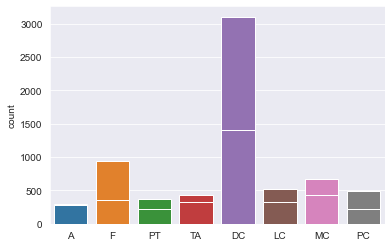

In [47]:
# 100X
data_analysis(train_set, val_set)

C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\si

X: Counter({'DC': 3033, 'F': 962, 'MC': 618, 'LC': 503, 'PC': 461, 'TA': 415, 'PT': 338, 'A': 286})
Y: Counter({'DC': 300, 'F': 92, 'LC': 87, 'TA': 63, 'MC': 55, 'PT': 52, 'A': 48, 'PC': 47})
X: Counter({'DC': 3033, 'F': 962, 'MC': 618, 'LC': 503, 'PC': 461, 'TA': 415, 'PT': 338, 'A': 286})
Y: Counter({'DC': 537, 'LC': 160, 'F': 147, 'MC': 139, 'TA': 114, 'A': 96, 'PC': 82, 'PT': 66})
X: Counter({'DC': 3033, 'F': 962, 'MC': 618, 'LC': 503, 'PC': 461, 'TA': 415, 'PT': 338, 'A': 286})
Y: Counter({'DC': 847, 'LC': 208, 'F': 202, 'MC': 199, 'TA': 163, 'A': 143, 'PC': 130, 'PT': 108})


C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\si

X: Counter({'DC': 3033, 'F': 962, 'MC': 618, 'LC': 503, 'PC': 461, 'TA': 415, 'PT': 338, 'A': 286})
Y: Counter({'DC': 1130, 'MC': 276, 'F': 267, 'LC': 266, 'TA': 218, 'A': 206, 'PC': 166, 'PT': 150})
X: Counter({'DC': 3033, 'F': 962, 'MC': 618, 'LC': 503, 'PC': 461, 'TA': 415, 'PT': 338, 'A': 286})
Y: Counter({'DC': 1447, 'MC': 362, 'F': 358, 'LC': 312, 'TA': 285, 'A': 269, 'PC': 214, 'PT': 202})


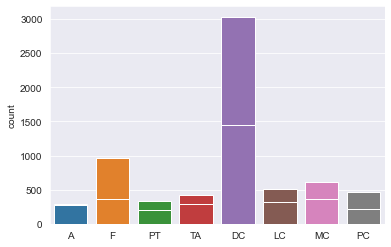

In [45]:
# 200X
data_analysis(train_set200, val_set200)

C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\si

X: Counter({'DC': 2684, 'F': 880, 'MC': 515, 'PC': 461, 'LC': 420, 'TA': 368, 'PT': 362, 'A': 271})
Y: Counter({'DC': 244, 'F': 76, 'LC': 67, 'PT': 59, 'MC': 57, 'TA': 56, 'PC': 50, 'A': 46})
X: Counter({'DC': 2684, 'F': 880, 'MC': 515, 'PC': 461, 'LC': 420, 'TA': 368, 'PT': 362, 'A': 271})
Y: Counter({'DC': 463, 'MC': 126, 'LC': 125, 'F': 122, 'TA': 116, 'A': 92, 'PC': 89, 'PT': 76})
X: Counter({'DC': 2684, 'F': 880, 'MC': 515, 'PC': 461, 'LC': 420, 'TA': 368, 'PT': 362, 'A': 271})
Y: Counter({'DC': 713, 'MC': 192, 'LC': 171, 'F': 168, 'TA': 163, 'PC': 140, 'A': 139, 'PT': 115})
X: Counter({'DC': 2684, 'F': 880, 'MC': 515, 'PC': 461, 'LC': 420, 'TA': 368, 'PT': 362, 'A': 271})
Y: Counter({'DC': 956, 'MC': 254, 'F': 231, 'TA': 225, 'LC': 224, 'A': 199, 'PC': 179, 'PT': 154})


C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahit\Anaconda3\lib\si

X: Counter({'DC': 2684, 'F': 880, 'MC': 515, 'PC': 461, 'LC': 420, 'TA': 368, 'PT': 362, 'A': 271})
Y: Counter({'DC': 1256, 'MC': 330, 'F': 305, 'TA': 282, 'LC': 265, 'A': 259, 'PC': 229, 'PT': 213})


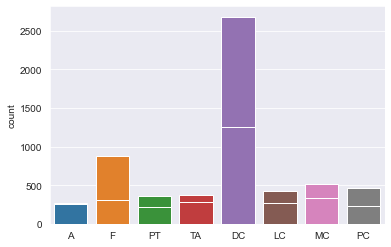

In [46]:
# 400X
data_analysis(train_set400, val_set400)

In [129]:
# visualize random Benign tumor

# plt.figure(figsize = (5,5))
# plt.imshow(train[1][0])
# plt.title(train[0][1])

In [130]:
# visualize random Malignant tumor

# plt.figure(figsize = (5,5))
# plt.imshow(train[-1][0])
# plt.title(train[-1][1])

# View how much data is available per fold per magnification level

In [106]:
def folds_analysis(train, test):
    x = []
    for i in train:
        if i[1] == 0:
            x.append("A")
        elif i[1] == 1:
            x.append("F")
        elif i[1] == 2:
            x.append("PT")
        elif i[1] == 3:
            x.append("TA")
        elif i[1] == 4:
            x.append("DC")
        elif i[1] == 5:
            x.append("LC")
        elif i[1] == 6:
            x.append("MC")
        elif i[1] == 7:
            x.append("PC")
            
    y = []
    for j in test:
        if j[1] == 0:
            y.append("A")
        elif j[1] == 1:
            y.append("F")
        elif j[1] == 2:
            y.append("PT")
        elif j[1] == 3:
            y.append("TA")
        elif j[1] == 4:
            y.append("DC")
        elif j[1] == 5:
            y.append("LC")
        elif j[1] == 6:
            y.append("MC")
        elif j[1] == 7:
            y.append("PC")
    
    xcount = Counter(x)
    ycount = Counter(y)
    
    print("Test Count: ", sorted(xcount.items()))    
    print("Val Count: ", sorted(ycount.items()))
    
#     plt.figure()
#     sns.countplot(x)
#     plt.show()
    
#     plt.figure()
#     sns.countplot(y)
#     plt.show()
            
    return x, y

In [108]:
# 40X
for fold in range(len(train_set)):
    print("Fold Number:", fold+1)
    folds_analysis(train_set40[fold], val_set40[fold])

Fold Number: 1
Test Count:  [('A', 64), ('DC', 566), ('F', 173), ('LC', 73), ('MC', 143), ('PC', 98), ('PT', 51), ('TA', 82)]
Val Count:  [('A', 50), ('DC', 298), ('F', 80), ('LC', 83), ('MC', 62), ('PC', 47), ('PT', 58), ('TA', 67)]
Fold Number: 2
Test Count:  [('A', 64), ('DC', 625), ('F', 187), ('LC', 83), ('MC', 117), ('PC', 105), ('PT', 96), ('TA', 86)]
Val Count:  [('A', 50), ('DC', 239), ('F', 66), ('LC', 73), ('MC', 88), ('PC', 40), ('PT', 13), ('TA', 63)]
Fold Number: 3
Test Count:  [('A', 64), ('DC', 587), ('F', 187), ('LC', 103), ('MC', 134), ('PC', 91), ('PT', 71), ('TA', 101)]
Val Count:  [('A', 50), ('DC', 277), ('F', 66), ('LC', 53), ('MC', 71), ('PC', 54), ('PT', 38), ('TA', 48)]
Fold Number: 4
Test Count:  [('A', 50), ('DC', 575), ('F', 181), ('LC', 105), ('MC', 128), ('PC', 103), ('PT', 71), ('TA', 82)]
Val Count:  [('A', 64), ('DC', 289), ('F', 72), ('LC', 51), ('MC', 77), ('PC', 42), ('PT', 38), ('TA', 67)]
Fold Number: 5
Test Count:  [('A', 50), ('DC', 542), ('F', 

In [107]:
# 100X
for fold in range(len(train_set)):
    print("Fold Number:", fold+1)
    folds_analysis(train_set[fold], val_set[fold])

Fold Number: 1
Test Count:  [('A', 66), ('DC', 607), ('F', 177), ('LC', 83), ('MC', 151), ('PC', 97), ('PT', 55), ('TA', 85)]
Val Count:  [('A', 47), ('DC', 296), ('F', 83), ('LC', 87), ('MC', 71), ('PC', 45), ('PT', 66), ('TA', 65)]
Fold Number: 2
Test Count:  [('A', 66), ('DC', 678), ('F', 195), ('LC', 99), ('MC', 131), ('PC', 104), ('PT', 105), ('TA', 83)]
Val Count:  [('A', 47), ('DC', 225), ('F', 65), ('LC', 71), ('MC', 91), ('PC', 38), ('PT', 16), ('TA', 67)]
Fold Number: 3
Test Count:  [('A', 64), ('DC', 628), ('F', 195), ('LC', 118), ('MC', 138), ('PC', 88), ('PT', 82), ('TA', 99)]
Val Count:  [('A', 49), ('DC', 275), ('F', 65), ('LC', 52), ('MC', 84), ('PC', 54), ('PT', 39), ('TA', 51)]
Fold Number: 4
Test Count:  [('A', 47), ('DC', 635), ('F', 190), ('LC', 104), ('MC', 141), ('PC', 104), ('PT', 82), ('TA', 80)]
Val Count:  [('A', 66), ('DC', 268), ('F', 70), ('LC', 66), ('MC', 81), ('PC', 38), ('PT', 39), ('TA', 70)]
Fold Number: 5
Test Count:  [('A', 47), ('DC', 557), ('F', 

In [109]:
# 200X
for fold in range(len(train_set)):
    print("Fold Number:", fold+1)
    folds_analysis(train_set200[fold], val_set200[fold])

Fold Number: 1
Test Count:  [('A', 63), ('DC', 596), ('F', 172), ('LC', 76), ('MC', 141), ('PC', 88), ('PT', 56), ('TA', 77)]
Val Count:  [('A', 48), ('DC', 300), ('F', 92), ('LC', 87), ('MC', 55), ('PC', 47), ('PT', 52), ('TA', 63)]
Fold Number: 2
Test Count:  [('A', 63), ('DC', 659), ('F', 209), ('LC', 90), ('MC', 112), ('PC', 100), ('PT', 94), ('TA', 89)]
Val Count:  [('A', 48), ('DC', 237), ('F', 55), ('LC', 73), ('MC', 84), ('PC', 35), ('PT', 14), ('TA', 51)]
Fold Number: 3
Test Count:  [('A', 64), ('DC', 586), ('F', 209), ('LC', 115), ('MC', 136), ('PC', 87), ('PT', 66), ('TA', 91)]
Val Count:  [('A', 47), ('DC', 310), ('F', 55), ('LC', 48), ('MC', 60), ('PC', 48), ('PT', 42), ('TA', 49)]
Fold Number: 4
Test Count:  [('A', 48), ('DC', 613), ('F', 199), ('LC', 105), ('MC', 119), ('PC', 99), ('PT', 66), ('TA', 85)]
Val Count:  [('A', 63), ('DC', 283), ('F', 65), ('LC', 58), ('MC', 77), ('PC', 36), ('PT', 42), ('TA', 55)]
Fold Number: 5
Test Count:  [('A', 48), ('DC', 579), ('F', 17

In [110]:
# 400X
for fold in range(len(train_set)):
    print("Fold Number:", fold+1)
    folds_analysis(train_set400[fold], val_set400[fold])

Fold Number: 1
Test Count:  [('A', 60), ('DC', 544), ('F', 161), ('LC', 70), ('MC', 112), ('PC', 88), ('PT', 56), ('TA', 74)]
Val Count:  [('A', 46), ('DC', 244), ('F', 76), ('LC', 67), ('MC', 57), ('PC', 50), ('PT', 59), ('TA', 56)]
Fold Number: 2
Test Count:  [('A', 60), ('DC', 569), ('F', 191), ('LC', 79), ('MC', 100), ('PC', 99), ('PT', 98), ('TA', 70)]
Val Count:  [('A', 46), ('DC', 219), ('F', 46), ('LC', 58), ('MC', 69), ('PC', 39), ('PT', 17), ('TA', 60)]
Fold Number: 3
Test Count:  [('A', 59), ('DC', 538), ('F', 191), ('LC', 91), ('MC', 103), ('PC', 87), ('PT', 76), ('TA', 83)]
Val Count:  [('A', 47), ('DC', 250), ('F', 46), ('LC', 46), ('MC', 66), ('PC', 51), ('PT', 39), ('TA', 47)]
Fold Number: 4
Test Count:  [('A', 46), ('DC', 545), ('F', 174), ('LC', 84), ('MC', 107), ('PC', 99), ('PT', 76), ('TA', 68)]
Val Count:  [('A', 60), ('DC', 243), ('F', 63), ('LC', 53), ('MC', 62), ('PC', 39), ('PT', 39), ('TA', 62)]
Fold Number: 5
Test Count:  [('A', 46), ('DC', 488), ('F', 163),